# 퍼셉트론 구현하기

## 간단한 구현

In [38]:
# x1과 x2를 인수로 받는 AND라는 함수입니다.

In [39]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7 # w1, w2 ,theta는 함수 안에서 초기화
    tmp = x1*w1 + x2*w2
# 가중치를 곱한 입력의 총합이 임계값을 넘으면 1을 반환하고 그 외에는 0을 반환한다.
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [40]:
AND(0,0) # 0을 출력

0

In [41]:
AND(1,0) # 0을 출력

0

In [42]:
AND(0,1) # 0을 출력

0

In [43]:
AND(1,1) # 0을 출력

1

## 가중치와 편향 도입

In [44]:
import numpy as np

In [45]:
x = np.array([0,1])
x

array([0, 1])

In [46]:
w = np.array([0.5, 0.5])
w

array([0.5, 0.5])

In [47]:
b = -0.7 # b = bias

In [48]:
w*x # 넘파이 배열끼리의 곱셈은 두 배열의 원소 수가 같다면 각 원소끼리 곱합니다.

array([0. , 0.5])

In [49]:
np.sum(w*x)

0.5

In [50]:
np.sum(w*x) + b

-0.19999999999999996

## 가중치와 편향 구현하기

'가중치와 편향을 도입'한 AND 게이트는 다음과 같이 구현할 수 있습니다.

#### AND 게이트

In [51]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7 # 뉴런이 얼마나 쉽게 활성화(결과로 1을 출력) 하느냐를 조정하는 매개변수
    # for example, b = -0.1이면 각 입력 신호에 가중치를 곱한 값들의 합이 0.1을 초과할 때만 뉴런이 활성화 합니다.
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

#### NAND 게이트

In [52]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # AND와는 가중치(w와 b)만 다르다!
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

#### OR 게이트

In [53]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

## 퍼셉트론의 한계

##### XOR 게이트

XOR 게이트는 배타적 논리합이라는 논리 회로입니다. x1과 x2 중 한쪽이 1일 때만 1을 출력합니다.('배타적'이란 자기 외에는 거부한다는 의미죠). 자, 이 XOR 게이트를 퍼셉트론으로 구현하려면 가중치 매개변수 값을 어떻게 설정하면 될까요?

In [54]:
from IPython.display import Image

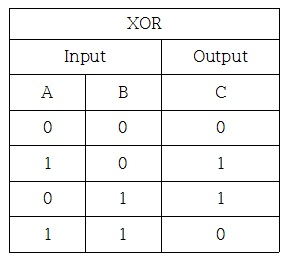

In [55]:
Image(filename='./images/xor_gate.png')

사실 지금까지 본 퍼셉트론으로는 이 XOR 게이트를 구현할 수 없습니다. 왜 AND와 OR는 되고 XOR는 안 될까요?

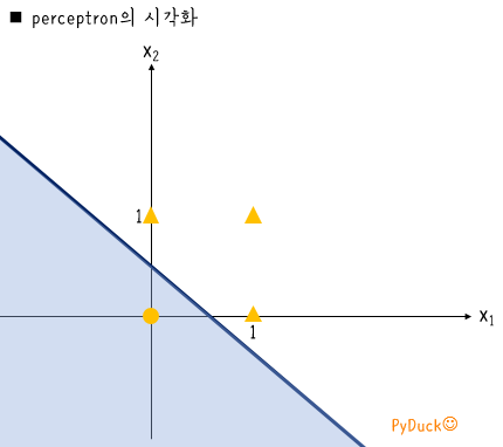

In [56]:
Image(filename='./images/or_gate_visualization.png')

OR 게이트는 (x1, x2) = (0, 0)일 때 0을 출력하고 (0,1), (1,0), (1,1) 일 때는 1을 출력합니다. 그림에서 0을 원(o), 1을 삼각형(△)으로 표시했습니다. OR 게이트를 만들려면 위의 그림의 o와 △를 직선으로 나눠야 합니다. 실제로 이 그림의 직선은 네 점을 제대로 나누고 있습니다.

그럼 XOR 게이트의 경우는 어떨까요?

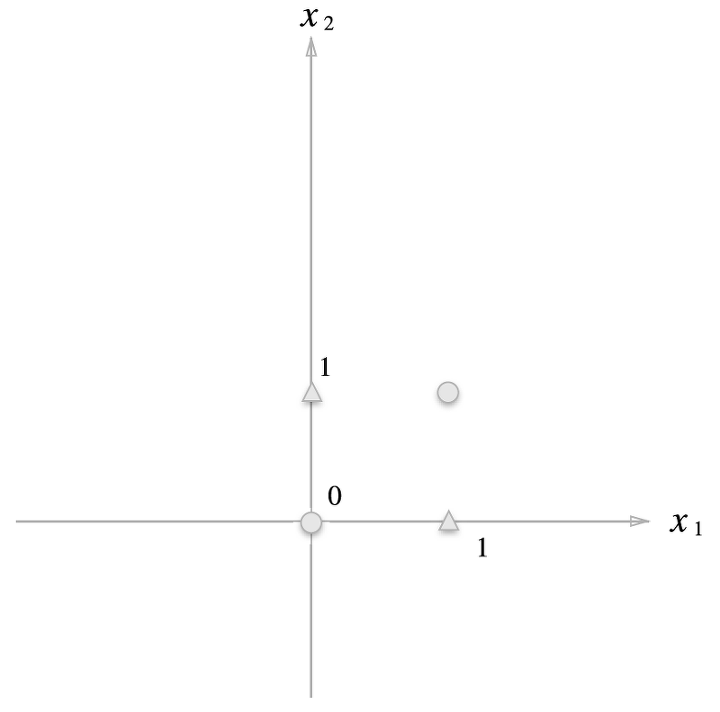

In [57]:
Image(filename='./images/xor_gate_visualization.png')

위의 그림을 o와 △을 직선 하나로 나누는 방법은 아무리 생각해도 떠오르지 않았습니다.

### 선형과 비선형

곡선이라면 o과 △를 나눌 수 있습니다.

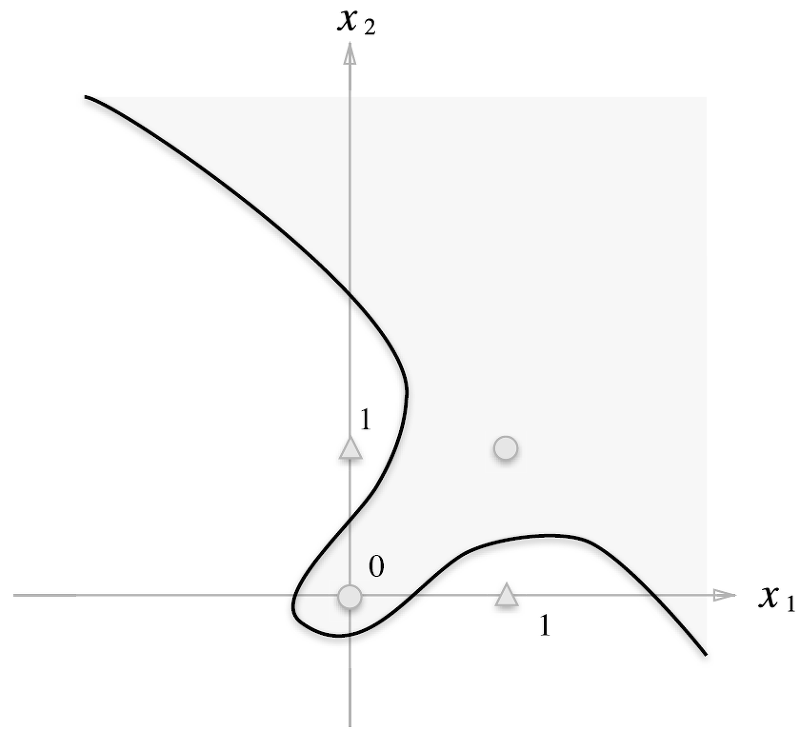

In [58]:
Image(filename='./images/xor_gate_vis_curve.png')

## 다층 퍼셉트론이 출동한다면

퍼셉트론의 아름다움은 '층을 쌓아' **다층 퍼셉트론*multi-layer perceptron*을 만들 수 있다는 데 있습니다.** 이번에는 층을 하나 더 쌓아서 XOR를 표현해 보겠습니다.

### 기존 게이트 조합하기

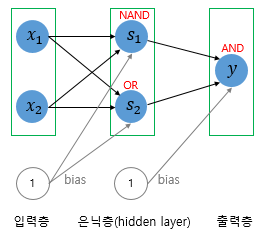

In [59]:
Image(filename='./images/xor_gate_multi_perceptron.jpg')

기존 게이트들을 조합해서 출력하면 XOR의 출력과 같습니다.

### XOR 게이트 구현하기

In [60]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [61]:
XOR(0,0)

0

In [62]:
XOR(1,0)

1

In [63]:
XOR(0,1)

1

In [64]:
XOR(1,1)

0

위의 그림처럼 XOR은 다층 구조의 네트워크입니다.

## 정리

* 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
* 퍼셉트론에서는 '가중치'와 '편향'을 매개변수로 설정한다.
* 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다.
* XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다.
* 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.
* 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
* 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 잇다.